In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('orders_autumn_2020.csv')

In [3]:
df.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


<AxesSubplot:xlabel='ITEM_COUNT', ylabel='ACTUAL_DELIVERY_MINUTES'>

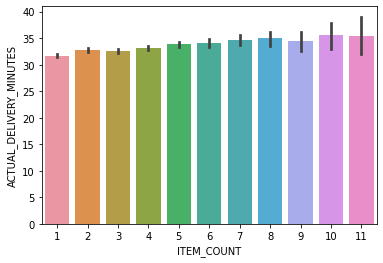

In [4]:
sns.barplot(data=df, x=df.ITEM_COUNT, y=df.ACTUAL_DELIVERY_MINUTES)

<AxesSubplot:xlabel='ITEM_COUNT', ylabel='Count'>

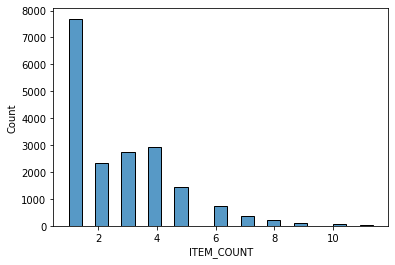

In [5]:
sns.histplot(data=df, x="ITEM_COUNT", binwidth=0.45)

<AxesSubplot:xlabel='CLOUD_COVERAGE', ylabel='Count'>

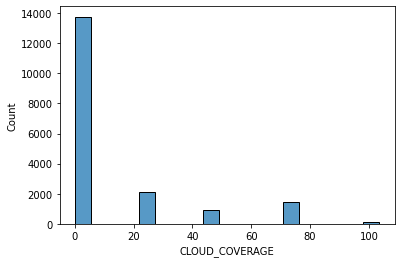

In [6]:
sns.histplot(data=df, x="CLOUD_COVERAGE", binwidth=5.45)

<AxesSubplot:xlabel='TEMPERATURE', ylabel='Count'>

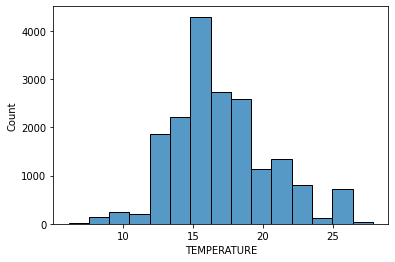

In [7]:
sns.histplot(data=df, x="TEMPERATURE", binwidth=1.45)

<AxesSubplot:xlabel='WIND_SPEED', ylabel='Count'>

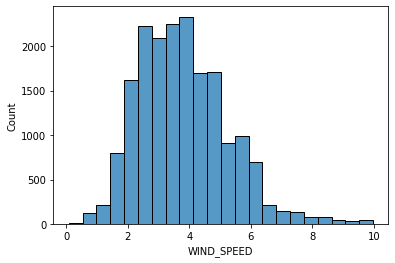

In [8]:
sns.histplot(data=df, x="WIND_SPEED", binwidth=0.45)

<AxesSubplot:xlabel='PRECIPITATION', ylabel='Count'>

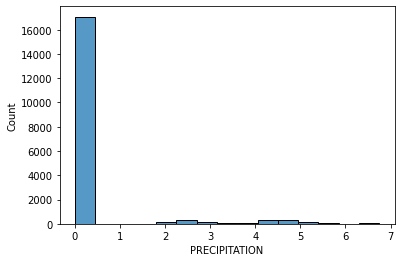

In [9]:
sns.histplot(data=df, x="PRECIPITATION", binwidth=0.45)

<AxesSubplot:xlabel='PRECIPITATION', ylabel='ACTUAL_DELIVERY_MINUTES'>

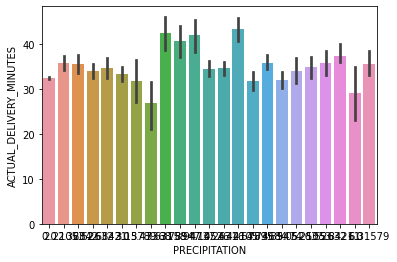

In [10]:
sns.barplot(data=df, x='PRECIPITATION', y='ACTUAL_DELIVERY_MINUTES')

In [11]:
df.value_counts('PRECIPITATION')

PRECIPITATION
0.00000    17068
2.21053      182
4.26316      161
2.52632      158
3.00000      155
4.10526      127
4.89474      126
2.36842      112
4.73684      100
5.21053       81
4.57895       76
2.68421       66
5.52632       60
5.05263       57
6.31579       46
4.42105       40
3.78947       20
3.15789       20
3.63158       18
3.94737       14
6.00000       11
3.47368        5
5.84211        3
dtype: int64

In [12]:
df.value_counts('ITEM_COUNT')

ITEM_COUNT
1     7692
4     2949
3     2761
2     2343
5     1439
6      744
7      366
8      217
9      103
10      67
11      25
dtype: int64

In [13]:
df['DISTANCE'] = ((df.USER_LAT - df.VENUE_LAT)**2 + (df.USER_LONG - df.VENUE_LONG)**2)**0.5

In [14]:
df.value_counts('DISTANCE')

DISTANCE
0.006708    195
0.009487    153
0.004243    123
0.003606    113
0.005831    113
           ... 
0.029017      1
0.029069      1
0.029069      1
0.029069      1
0.072250      1
Length: 2085, dtype: int64

In [15]:
df.value_counts('ACTUAL_DELIVERY_MINUTES', sort = False)

ACTUAL_DELIVERY_MINUTES
6       4
7       5
8       8
9      19
10     29
11     39
12     77
13     97
14    137
15    185
16    227
17    249
18    311
19    360
20    427
21    456
22    515
23    574
24    571
25    652
26    678
27    659
28    687
29    718
30    680
31    668
32    663
33    673
34    601
35    611
36    615
37    542
38    569
39    515
40    486
41    486
42    431
43    420
44    413
45    367
46    329
47    352
48    302
49    269
50    219
51    184
52    195
53    192
54    112
55     68
56     43
57     10
58      7
dtype: int64

In [16]:
df['DISTANCE'] *= 100

In [17]:
df2 = df

In [18]:
df2 = df2.drop(['USER_LAT', 'USER_LONG','VENUE_LAT', 'VENUE_LONG','ESTIMATED_DELIVERY_MINUTES','ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES'], axis = 1)

In [19]:
df2.describe()

,ITEM_COUNT,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,DISTANCE
count,18706.000000,18706.000000,18429.000000,18429.000000,18429.000000,18706.000000,18706.000000
mean,2.688228,32.608254,11.996853,16.973536,3.790991,0.332756,1.365405
std,1.886455,10.018879,23.812605,3.411900,1.456017,1.129234,0.846967
min,1.000000,6.000000,0.000000,6.100000,0.077419,0.000000,0.000000
25%,1.000000,25.000000,0.000000,14.400000,2.696190,0.000000,0.728011
50%,2.000000,32.000000,0.000000,16.700000,3.631970,0.000000,1.170470
75%,4.000000,40.000000,25.000000,18.900000,4.692530,0.000000,1.802776
max,11.000000,58.000000,100.000000,26.700000,9.857300,6.315790,7.224957


In [20]:
df2.nunique()

TIMESTAMP                  15135
ITEM_COUNT                    11
ACTUAL_DELIVERY_MINUTES       53
CLOUD_COVERAGE                 5
TEMPERATURE                   40
WIND_SPEED                   926
PRECIPITATION                 23
DISTANCE                    2083
dtype: int64

In [21]:
df.nunique()

TIMESTAMP                                               15135
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES       72
ITEM_COUNT                                                 11
USER_LAT                                                   49
USER_LONG                                                  72
VENUE_LAT                                                  55
VENUE_LONG                                                 84
ESTIMATED_DELIVERY_MINUTES                                 55
ACTUAL_DELIVERY_MINUTES                                    53
CLOUD_COVERAGE                                              5
TEMPERATURE                                                40
WIND_SPEED                                                926
PRECIPITATION                                              23
DISTANCE                                                 2083
dtype: int64

In [22]:
df2['ITEM_COUNT'].unique()

array([ 1,  8,  4,  3,  2,  7,  6,  9,  5, 10, 11])

In [23]:
df2.isnull().sum()

TIMESTAMP                    0
ITEM_COUNT                   0
ACTUAL_DELIVERY_MINUTES      0
CLOUD_COVERAGE             277
TEMPERATURE                277
WIND_SPEED                 277
PRECIPITATION                0
DISTANCE                     0
dtype: int64

In [24]:
corelation = df2.corr()

<AxesSubplot:>

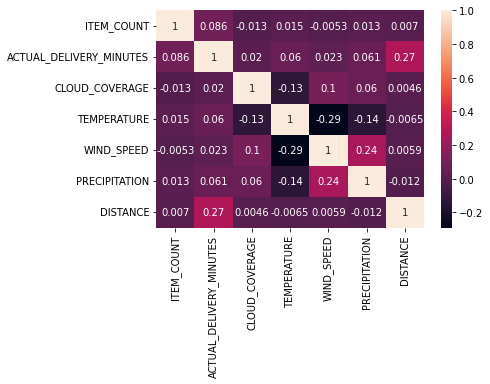

In [25]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

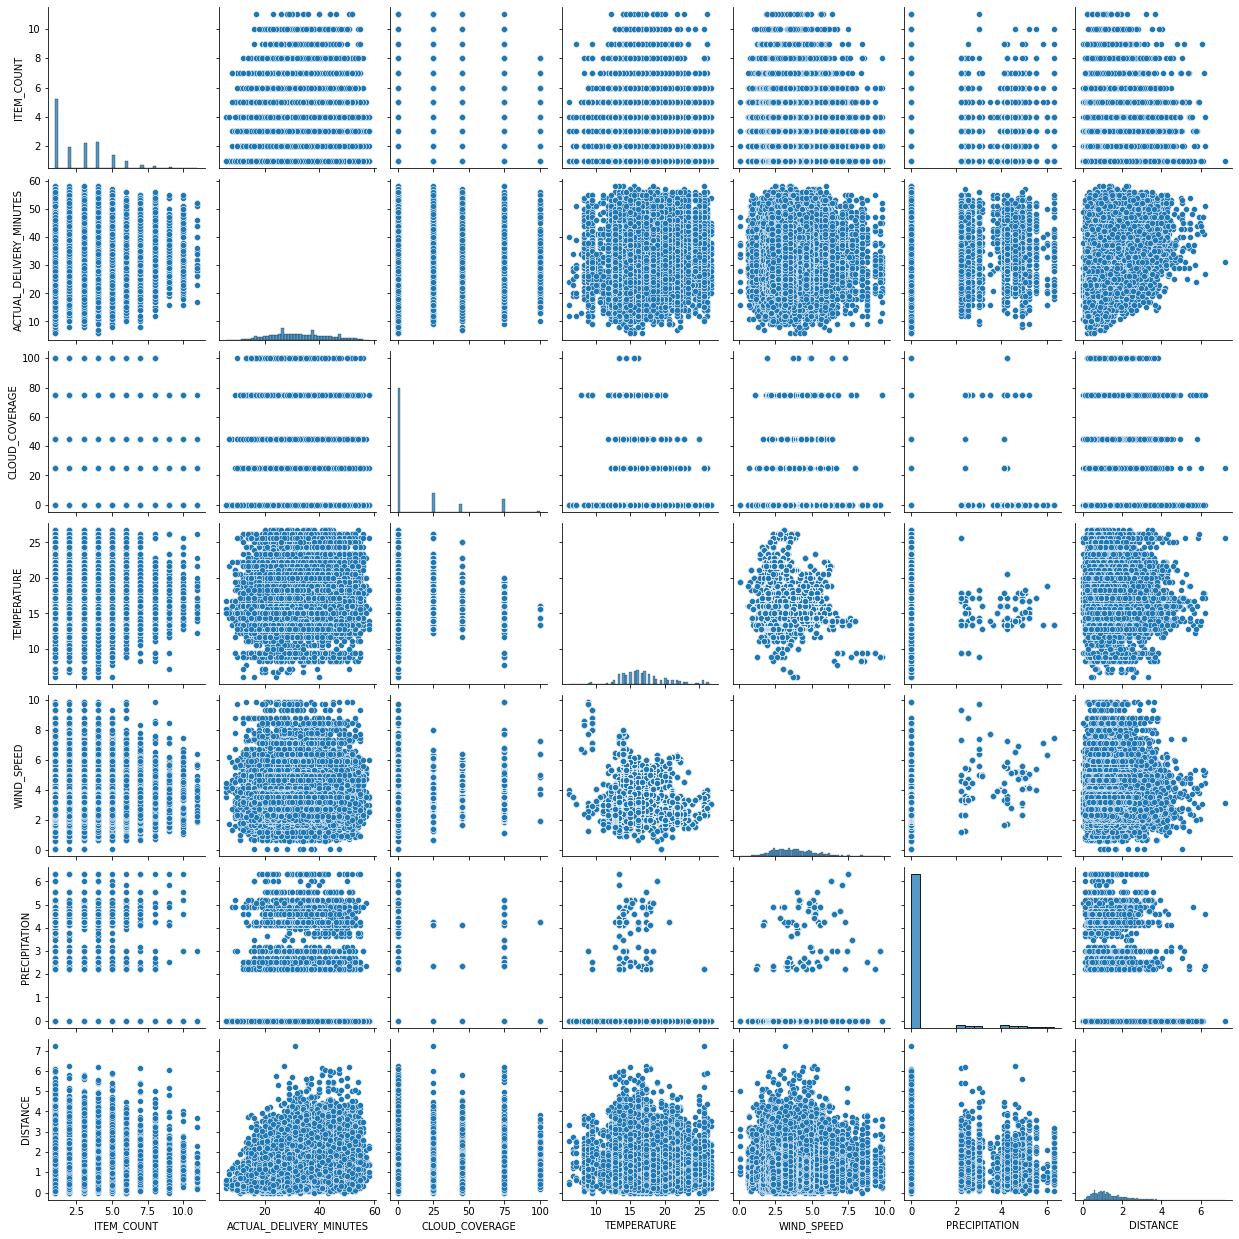

In [26]:
sns.pairplot(df2)

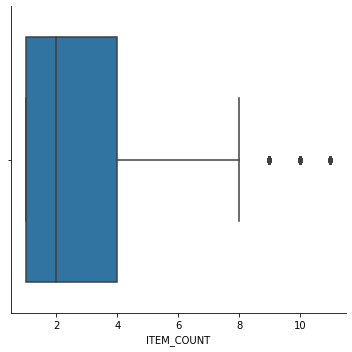

In [27]:
sns.catplot(x = 'ITEM_COUNT', kind = 'box', data = df2)

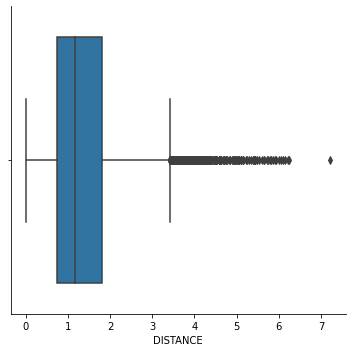

In [28]:
sns.catplot(x = 'DISTANCE', kind = 'box', data = df2)

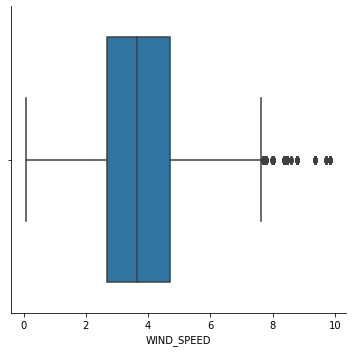

In [29]:
sns.catplot(x = 'WIND_SPEED', kind = 'box', data = df2)

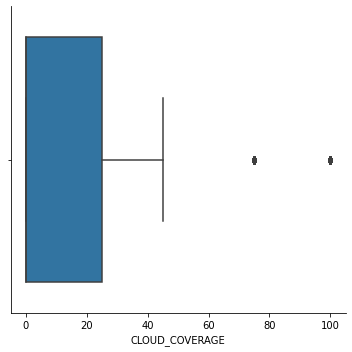

In [30]:
sns.catplot(x = 'CLOUD_COVERAGE', kind = 'box', data = df2)

In [31]:
df2.loc[df2['CLOUD_COVERAGE'].isna(),'CLOUD_COVERAGE'] = df2['CLOUD_COVERAGE'].mean()
df2.loc[df2['TEMPERATURE'].isna(),'TEMPERATURE'] = df2['TEMPERATURE'].mean()
df2.loc[df2['WIND_SPEED'].isna(),'WIND_SPEED'] = df2['WIND_SPEED'].mean()

In [32]:
Q1 =  df2['CLOUD_COVERAGE'].quantile(0.25)
Q3 = df2['CLOUD_COVERAGE'].quantile(0.75)
IQR = Q3 - Q1
df2.loc[df2['CLOUD_COVERAGE'] < Q1-1.5*IQR, 'CLOUD_COVERAGE'] = Q1-1.5*IQR
df2.loc[df2['CLOUD_COVERAGE'] > Q3+1.5*IQR, 'CLOUD_COVERAGE'] = Q3+1.5*IQR

In [33]:
Q1 =  df2['TEMPERATURE'].quantile(0.25)
Q3 = df2['TEMPERATURE'].quantile(0.75)
IQR = Q3 - Q1
df2.loc[df2['TEMPERATURE'] < Q1-1.5*IQR, 'TEMPERATURE'] = Q1-1.5*IQR
df2.loc[df2['TEMPERATURE'] > Q3+1.5*IQR, 'TEMPERATURE'] = Q3+1.5*IQR

In [34]:
Q1 =  df2['WIND_SPEED'].quantile(0.25)
Q3 = df2['WIND_SPEED'].quantile(0.75)
IQR = Q3 - Q1
df2.loc[df2['WIND_SPEED'] < Q1-1.5*IQR, 'WIND_SPEED'] = Q1-1.5*IQR
df2.loc[df2['WIND_SPEED'] > Q3+1.5*IQR, 'WIND_SPEED'] = Q3+1.5*IQR

In [35]:
Q1 =  df2['DISTANCE'].quantile(0.25)
Q3 = df2['DISTANCE'].quantile(0.75)
IQR = Q3 - Q1
df2.loc[df2['DISTANCE'] < Q1-1.5*IQR, 'DISTANCE'] = Q1-1.5*IQR
df2.loc[df2['DISTANCE'] > Q3+1.5*IQR, 'DISTANCE'] = Q3+1.5*IQR

In [36]:
Q1 =  df2['ITEM_COUNT'].quantile(0.25)
Q3 = df2['ITEM_COUNT'].quantile(0.75)
IQR = Q3 - Q1
df2.loc[df2['ITEM_COUNT'] < Q1-1.5*IQR, 'ITEM_COUNT'] = Q1-1.5*IQR
df2.loc[df2['ITEM_COUNT'] > Q3+1.5*IQR, 'ITEM_COUNT'] = Q3+1.5*IQR

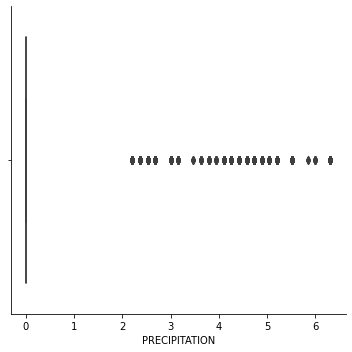

In [37]:
sns.catplot(x = 'PRECIPITATION', kind = 'box', data = df2)

In [38]:
df2.drop('PRECIPITATION', axis=1)

,TIMESTAMP,ITEM_COUNT,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,DISTANCE
0,2020-08-01 06:07:00.000,1.0,10,0.0,15.0,3.53644,0.200000
1,2020-08-01 06:17:00.000,8.0,32,0.0,15.0,3.53644,1.972308
2,2020-08-01 06:54:00.000,4.0,6,0.0,15.0,3.53644,0.223607
3,2020-08-01 07:09:00.000,3.0,26,0.0,16.7,3.52267,3.414923
4,2020-08-01 07:10:00.000,2.0,26,0.0,16.7,3.52267,0.721110
...,...,...,...,...,...,...,...
18701,2020-09-30 19:27:00.000,1.0,23,0.0,12.8,2.34419,0.100000
18702,2020-09-30 19:36:00.000,6.0,15,0.0,12.8,2.34419,0.860233
18703,2020-09-30 19:39:00.000,3.0,11,0.0,12.8,2.34419,0.728011
18704,2020-09-30 19:42:00.000,3.0,10,0.0,12.8,2.34419,0.412311


In [39]:
df2['DISTANCE'].unique()

array([0.2       , 1.97230829, 0.2236068 , ..., 2.68700577, 2.88444102,
       1.72626765])

In [40]:
df2['ITEM_COUNT'] = [int(x) for x in df2['ITEM_COUNT']]

In [41]:
df2['ITEM_COUNT'] = round(df2['ITEM_COUNT'],0)

In [42]:
df2['WIND_SPEED'] = round(df2['WIND_SPEED'],1)

In [43]:
df2['DAY_TIME'] = [x[11:13] for x in df2['TIMESTAMP']]

<AxesSubplot:xlabel='DAY_TIME', ylabel='Count'>

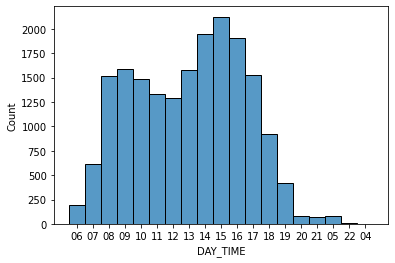

In [44]:
sns.histplot(data=df2, x="DAY_TIME", binwidth=0.45)

<AxesSubplot:xlabel='DAY_TIME', ylabel='ACTUAL_DELIVERY_MINUTES'>

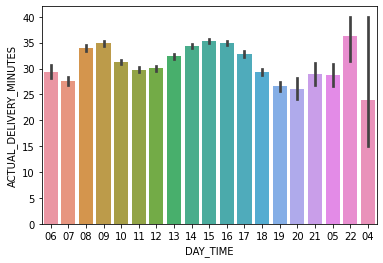

In [45]:
sns.barplot(data=df2, x='DAY_TIME', y='ACTUAL_DELIVERY_MINUTES')

In [46]:
df2['DAY_TIME'].unique()

array(['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '05', '22', '04'], dtype=object)

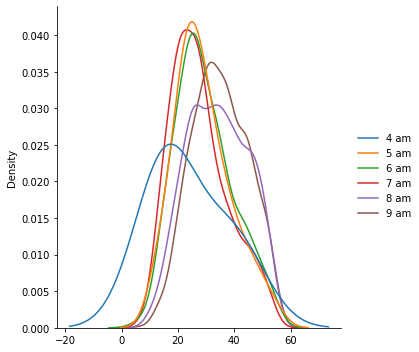

In [47]:
sns.displot({
    '4 am': df2[df2.DAY_TIME == '04'].ACTUAL_DELIVERY_MINUTES,
    '5 am': df2[df2.DAY_TIME == '05'].ACTUAL_DELIVERY_MINUTES,
    '6 am': df2[df2.DAY_TIME == '06'].ACTUAL_DELIVERY_MINUTES,
    '7 am': df2[df2.DAY_TIME == '07'].ACTUAL_DELIVERY_MINUTES,
    '8 am': df2[df2.DAY_TIME == '08'].ACTUAL_DELIVERY_MINUTES,
    '9 am': df2[df2.DAY_TIME == '09'].ACTUAL_DELIVERY_MINUTES},
    kind = 'kde',
    common_norm = False)
        

<AxesSubplot:xlabel='TEMPERATURE', ylabel='Count'>

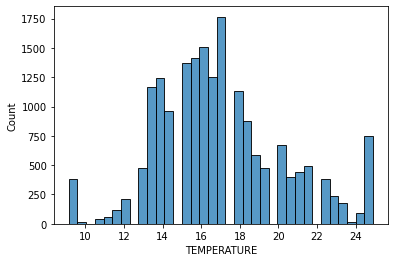

In [48]:
sns.histplot(data=df2, x="TEMPERATURE", binwidth=0.45)

In [49]:
type(df2['ACTUAL_DELIVERY_MINUTES'][0])

numpy.int64

In [50]:
df2

,TIMESTAMP,ITEM_COUNT,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,DISTANCE,DAY_TIME
0,2020-08-01 06:07:00.000,1,10,0.0,15.0,3.5,0.0,0.200000,06
1,2020-08-01 06:17:00.000,8,32,0.0,15.0,3.5,0.0,1.972308,06
2,2020-08-01 06:54:00.000,4,6,0.0,15.0,3.5,0.0,0.223607,06
3,2020-08-01 07:09:00.000,3,26,0.0,16.7,3.5,0.0,3.414923,07
4,2020-08-01 07:10:00.000,2,26,0.0,16.7,3.5,0.0,0.721110,07
...,...,...,...,...,...,...,...,...,...
18701,2020-09-30 19:27:00.000,1,23,0.0,12.8,2.3,0.0,0.100000,19
18702,2020-09-30 19:36:00.000,6,15,0.0,12.8,2.3,0.0,0.860233,19
18703,2020-09-30 19:39:00.000,3,11,0.0,12.8,2.3,0.0,0.728011,19
18704,2020-09-30 19:42:00.000,3,10,0.0,12.8,2.3,0.0,0.412311,19


In [51]:
X = df2.drop(['ACTUAL_DELIVERY_MINUTES','TIMESTAMP'], axis=1)
y = df2['ACTUAL_DELIVERY_MINUTES']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.20, shuffle = True, random_state=42)

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
clf = SGDRegressor()
parametrs = { 'tol': np.arange (0.0001, 0.1),
              'eta0': np.arange (0.0001, 0.1)
            }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_test,y_test)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'eta0': array([0.0001]), 'tol': array([0.0001])})

In [53]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SGDRegressor(eta0=0.0001, tol=0.0001)

 The best score across ALL searched params:
 0.0083839372620931

 The best parameters across ALL searched params:
 {'eta0': 0.0001, 'tol': 0.0001}


In [54]:
clf2 = SGDRegressor(**grid.best_params_)
model = clf2.fit(X_test,y_test)

In [55]:
y_predict = model.predict(X_train)

In [59]:
def mae(y_train, y_predict):
    return np.mean(abs(y_train - y_predict))

In [60]:
mae(y_train, y_predict)

8.046924458950455

In [61]:
baseline_guess = np.median(y_train)

In [62]:
print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 32.00
Baseline Performance on the test set: MAE = 8.2456


In [ ]:
print(MSE)